# qDESS file reading script using DOSMA
###### Author: Zimu Huo
###### Date: 03.2022

See the DOSMA documentation, this is only a partice example


In [1]:
import os 
import numpy as np
import dosma as dm
from matplotlib import pyplot as plt
import math
import dosma as dm

221102-17:28:16,315 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.8.2


In [2]:
echo1Path = "../lib/resource/data/T2mapping/spoil30dcm/echo1"
echo2Path = "../lib/Resource/data/T2mapping/spoil30dcm/echo2"
dr = dm.DicomReader(num_workers=4, verbose=True)
dw = dm.DicomWriter(num_workers=4, verbose=True)

In [3]:
# Load qDESS DICOM data
echo1Volumes = dr.load(echo1Path, group_by="EchoNumbers")
echo2Volumes = dr.load(echo1Path, group_by="EchoNumbers")
echo1Tuple= tuple(echo1Volumes)
echo2Tuple= tuple(echo2Volumes)
print("echo1Tuple.dtype: ", echo1Tuple[0].dtype, ", echo1Tuple.dtype", echo1Tuple[0].dtype)
# Convert echos from int16 -> float
echo1 = echo1Tuple[0].astype(float)
echo2 = echo2Tuple[0].astype(float)
print("echo1.dtype: ", echo1.dtype, ", echo2.dtype", echo2.dtype)

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

echo1Tuple.dtype:  uint16 , echo1Tuple.dtype uint16
echo1.dtype:  float64 , echo2.dtype float64


In [5]:
# Print out the spatial properties of echo1
print("Orientation in RAS+ coordinates: ", echo1.orientation)
print("Pixel spacing (i.e. voxel size): ", echo1.pixel_spacing)
print("Scanner origin: ", echo1.scanner_origin)
print("Pixel array shape: ", echo1.shape)

# Echo 1 and echo 2 have the same dimensions
# (i.e. shape, orientation, pixel spacing, and scanner origin).
# This means echo 1 and echo 2 of the qDESS scan are aligned.
if echo1.is_same_dimensions(echo2):
  print("Echoes 1 and 2 are aligned!")

Orientation in RAS+ coordinates:  ('AP', 'RL', 'IS')
Pixel spacing (i.e. voxel size):  (0.3605769276619, 0.3605769276619, 1.5)
Scanner origin:  (150.4236, 92.5595, -74.8109)
Pixel array shape:  (420, 416, 119)
Echoes 1 and 2 are aligned!


In [6]:
# Reorient scan to such that dimensions are:
# Left -> Right, Posterior -> Anterior, Superior -> Inferior
echo1_reformatted = echo1.reformat(("LR", "PA", "SI"))
print("Orientation in RAS+ coordinates: ", echo1_reformatted.orientation)
print("Pixel spacing (i.e. voxel size): ", echo1_reformatted.pixel_spacing)
print("Scanner origin: ", echo1_reformatted.scanner_origin)
print("Pixel array shape: ", echo1_reformatted.shape)

Orientation in RAS+ coordinates:  ('LR', 'PA', 'SI')
Pixel spacing (i.e. voxel size):  (0.3605769276619, 0.3605769276619, 1.5)
Scanner origin:  (0.7842, -58.5222, 102.1891)
Pixel array shape:  (416, 420, 119)


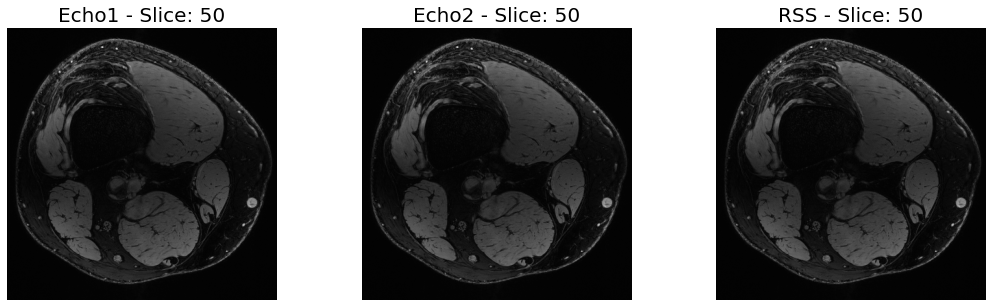

In [7]:
rss = np.sqrt(echo1 ** 2 + echo2 ** 2)

# Visualize slice of echo1, echo2, and rss volumes
_, axs = plt.subplots(1, 3, figsize=(18, 5))
slice_idx = 50
for idx, (ax, vol, title) in enumerate(zip(
    axs, [echo1, echo2, rss], ["Echo1", "Echo2", "RSS"]
)):
  ax.imshow(np.squeeze(vol.A[:, :, slice_idx]) / np.max(vol), cmap='gray')
  ax.set_axis_off()
  ax.set_title(f"{title} - Slice: {slice_idx}", fontsize=20)